In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from colossus.cosmology import cosmology
import scipy.interpolate as I
from src.template_generator import *
from src.build_lensing_maps import *

%matplotlib inline

In [2]:
'''
fnames=['/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4660.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4720.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4760.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4820.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4860.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4920.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4960.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5000.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5020.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5060.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5100.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5140.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5180.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5220.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5260.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5300.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5340.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3020.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3060.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3100.h5', 
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3140.h5',         
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3180.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3220.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3260.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3300.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3340.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3380.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3420.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3460.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3500.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3540.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3580.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3620.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3660.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3700.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3740.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3780.h5',        
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3820.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3860.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3900.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3940.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_3980.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4020.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4060.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4100.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4120.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4160.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4200.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4240.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4280.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4320.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4360.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4400.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4520.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4640.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4440.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4560.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4480.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4600.h5',
'/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4680.h5']

print('I am processing ',len(fnames),' files...')

'''
fnames=[]
for i in np.arange(5000,8700,50):
    fnames.append('/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_'+ str(i) +'.h5')


#fnames=['/Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_4660.h5']

build_maps_time_delay(1100,bsize=4000.,ngrid=256,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)

preparing maps...
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5000.h5
-0.9226537744406631 6.244613111280909
(-18911.101313336527+1099.543479720971j) (19703.860598600622-3089.936619417884j)


/Volumes/My Passport/cosmology/sdss3/lss_template_generator/src/template_generator.py:164: RuntimeWarning: divide by zero encountered in true_divide
  phi = -fac*(densft)/(kgrid**2)
/Volumes/My Passport/cosmology/sdss3/lss_template_generator/src/template_generator.py:164: RuntimeWarning: invalid value encountered in true_divide
  phi = -fac*(densft)/(kgrid**2)


4143316.1167677785 -4532136.074588249
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5050.h5
-0.9168681234126788 6.025289883179207
(-22254.51882595524-2933.9460197741273j) (22157.189676845785-4232.016464490522j)
4364256.7022318905 -4862746.6096592005
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5100.h5
-0.9168962554506969 6.4194280826330505
(-19712.70992440781-4242.63645353534j) (25121.97127665687+4072.361464889158j)
5676165.262767794 -4938268.49054216
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5150.h5
-0.9404096946030293 7.238118664705622
(-20310.821381744106+1811.4354207760457j) (24425.594606504477+6319.629297990271j)
6838785.390145026 -5687171.982379371
TEST R 1800.0
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_chain_sdss3_run3/mcmc_5200.h5
-0.9257614863413597 7.998802321806949
(-21

In [3]:
data=(np.load('borg_time_delay_maps.npz'))['td'][0]

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


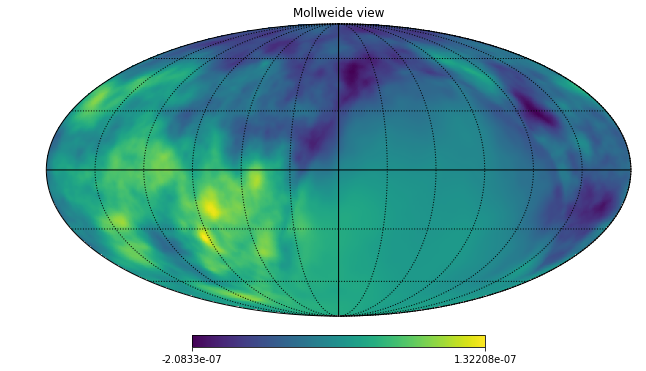

In [4]:
hp.mollview(data)
hp.graticule()
plt.show()

In [ ]:
build_maps_time_delay(1.,bsize=4000.,ngrid=256,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)

In [4]:
test='/Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy'
d=np.load(test)

In [2]:

fnames=['/Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy']


build_maps_lensing_resim(bsize=4000.,ngrid=512,qmin=np.array([-2200.0,-2000.0,-300.0]),filenames=fnames,random=False)


preparing maps...
processing borg mcmc file: /Volumes/My Passport/cosmology/sdss3/borg_DMsheet/dmsheet_density_6200.npy
TEST R 1800.0
preparing maps done...


In [4]:
mean= np.sum(d)/np.shape(d)[0]**3
delta=d/mean-1

plt.imshow(np.log(2+delta[:,:,256]),vmin=0,vmax=1)

NameError: name 'd' is not defined

In [7]:
np.shape(d)

(512, 512, 512)